# <span style="color: firebrick" style="text-align: center"> Data in Motion: Taking a Step Forward with Bellabeat </span>

Google Data Analytics - Capstone Project <br>
by **Stefan van Ettinger**

---
## <span style="color: indianred"> Introduction </span>
---
Throughout my journey of completing the [Google Data Analytics Professional Certificate](https://www.coursera.org/professional-certificates/google-data-analytics) course on Coursera, I've been introduced to data analysis and gained valuable skills. This project will help me solidify my knowledge and finally put it into practice. Furthermore, I challenged myself to acquire new skills by completing this very project.

The following skills will be used:
* Applying the practices and procedures associated with the data analysis process
* Formatting notebooks with Markdown
* Performing data analysis with R
* Using AI to aid with more complicated (or new) syntax
* Understanding notebooks and explanations of other data analysts in order to improve own work
* Showcasing results with visualizations

Enjoy reading and kind regards, <br>
~ Stefan van Ettinger

### <span style="color: indianred"> Table of content </span>
---
* [Case background](#case-background)
* [Business task](#business-task)
* [Data and data prepartion](#data)
* [Dataprocessing](#process)
 - [Dataset exploration and cleaning](#3.1)
 - [Datatypes and transformations](#3.2)
* [Data analysis](#analysis)
 - [Participation and smartwatch usage](#4.1)
 - [Step counting](#4.2)
 - [Running](#4.3)
 - [Intensities and sleep](#4.4)
 - [Weight](#4.5)
* [Key insights](#key)
* [Recommendations](#recom)

<a id="case-background"></a>
# <span style="color: firebrick"> Case background </span>
---
In this case study, data analysis will be performed for Bellabeat; a high-tech manufacturer of health-focused products for women. <br>

The Bellabeat app provides users with health data related to their activity, sleep, stress, menstrual cycle, and mindfulness habits. <br>
The Bellabeat app connects to their line of smart wellness products:
- Leaf - Bellabeat’s classic wellness tracker that can be worn as a bracelet, necklace, or clip.
- Time - their wellness watch.
- Spring - a water bottle that tracks daily water intake using smart technology.

### <span style="color: indianred"> About the Company </span>
---
Urška Sršen and Sando Mur founded Bellabeat, a high-tech company that manufactures health-focused smart products. <br>
Collecting data on activity, sleep, stress, and reproductive health has allowed Bellabeat to empower women with knowledge about their own health and habits. Since it was founded in 2013, Bellabeat has grown rapidly and quickly positioned itself as a tech-driven wellness company for women.

Bellabeat products became available through a growing number of online retailers in addition to their own e-commerce channel on their website. The company has invested in traditional advertising media, such as radio, out-of-home billboards, print, and television, but focuses on digital marketing extensively. Bellabeat invests year-round in Google Search, maintaining active Facebook and Instagram pages, and consistently engages consumers on Twitter. Additionally, Bellabeat runs video ads on Youtube and display ads on the Google Display Network to support campaigns around key marketing dates

### <span style="color: indianred"> Stakeholders </span>
---
- **Urska Srsen**: Bellabeat’s cofounder and Chief Creative Officer
- **Sando Mur**: Mathematician and Bellabeat’s cofounder; key member of the Bellabeat executive team
- **Bellabeat marketing analytics team**.

![](https://img.bazzar.hr/dEF84QQ/fn:logotype-01/czM6Ly9kYXRhc3Rv/cmUuYmF6emFyLmhy/L1hZakxBSzJzNm9N/VmtiYWZNdVN2ejlQ/eg)



<a id="business-task"></a>
# <span style="color: firebrick"> 1. Ask </span>
---
## <span style="color: indianred"> Business task </span>
---
Smart device data can be used to gain insight into how (potential) consumers are using their (non Bellabeat) smart devices. <br>
This will allow Bellabeat to enhance its marketing strategy, acquire new customers and improve their services for existing customers.

The following questions will be addressed: 
1. **What kind of activities is the Fitibit used for?**
2. **What trends or insights can be found for those activities?**
3. **How could these trends and insights help influence Bellabeat's marketing strategy?**

### <span style="color: indianred"> Deliverables </span>
---
- A clear summary of the business task
- A description of all data sources used
- Documentation of any cleaning or manipulation of data
- A summary of analysis
- Supporting visualizations and key findings
- High-level content recommendations based on the analysis

<a id="data"></a>
# <span style="color: firebrick"> 2. Prepare </span>
---
## <span style="color: indianred"> 2.1 Data source </span>
---
The dataset used is the [FitBit Fitness Tracker Data](https://www.kaggle.com/datasets/arashnic/fitbit) from Kaggle (CC0: Public Domain, dataset made available through Mobius). <br>
The following [manual](https://www.fitabase.com/media/1930/fitabasedatadictionary102320.pdf) can be used to understand the variables of the dataset(s).

## <span style="color: indianred"> 2.2 Reliability and Limitations </span>
---
*Positives*
- The data appears complete, comprehensive, and well-maintained by a data expert
- Parameters are likely to be comparable with Bellabeat's metrics

*Negatives*
- The number of participants is limited, and sampling could be biased (Amazon survey)
- Data is only derived from one fitness tracking device, the Fitbit
- Data is derived during a certain period of time - April and May 2016 - and is potentially outdated
- When no steps are recorded, missing values for various variables were replaced by zero
- In some instances data seems to be inaccurate (see: [3.1.2](#process))

We may conclude that those limitations **severly impact** data integrity and potential trends that can be analyzed.

## <span style="color: indianred"> 2.3 Dataset selection </span>
---
Among 18 datasets provided only 5 are relevant for our analyses, which are:
- dailyActivity_merged.csv
- heartrate_seconds_merged.csv
- hourlySteps_merged.csv
- sleepDay_merged.csv
- weightLogInfo_merged.csv


In [1]:
# Loading packages 
library(tidyverse)
library(patchwork)
library(ggridges)

# Importing data
dailyActivity <- read.csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
heartrate <- read.csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/heartrate_seconds_merged.csv")
hourlySteps <- read.csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlySteps_merged.csv")
sleep <- read.csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")
weightLog <- read.csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv")

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


<a id="process"></a>
# <span style="color: firebrick"> 3. Process </span>
---
The analyses will be carried out with R. <br>
In the following section the exploration, cleaning and transformation of the data will be documented. 
A brief summary will be given for each section.

<a id="3.1"></a> 
## <span style="color: indianred"> 3.1 Dataset exploration and cleaning </span>
---
In the following section the datasets will be explored.<br>
The number or participants will be determined, missing values, null values and duplicate rows will be identified. 

**Summary:** <br>
- Number of participants varies for each dataset.
- Not all participants took part in the data collection for the same amount of time.
- Rows (days) with TotalSteps = 0 were removed from the dataset, because they would affect averages.
- We removed rows (days) that had 1440 sedentary minutes (equivalent to 24 h), because this would be mutually exclusive with having a certain number of steps (i.e. some activity). 

### <span style="color: indianred"> 3.1.1 Check the data for missing values, null values and duplicates </span>
---

In [2]:
# Checking distinct values, missing values, null values, and duplicates
message("Checking for number of distinct ID:")
n_distinct(dailyActivity$Id)
n_distinct(heartrate$Id)
n_distinct(hourlySteps$Id)
n_distinct(sleep$Id)
n_distinct(weightLog$Id)

message("Checking for missing values:")
sum(is.na(dailyActivity)) 
sum(is.na(heartrate))
sum(is.na(hourlySteps))
sum(is.na(sleep))
sum(is.na(weightLog))

message("Checking for null values:")
sum(is.null(dailyActivity)) 
sum(is.null(heartrate))
sum(is.null(hourlySteps))
sum(is.null(sleep))
sum(is.null(weightLog))

message("Checking for duplicated rows:")
sum(duplicated(dailyActivity))
sum(duplicated(heartrate))
sum(duplicated(hourlySteps))
sum(duplicated(sleep))
sum(duplicated(weightLog))

Checking for number of distinct ID:



[1] 33

[1] 14

[1] 33

[1] 24

[1] 8

Checking for missing values:



[1] 0

[1] 0

[1] 0

[1] 0

[1] 65

Checking for null values:



[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

Checking for duplicated rows:



[1] 0

[1] 0

[1] 0

[1] 3

[1] 0

In [3]:
# Check if all 33 participants have particpated full timeframe in main dataframe - dailyActivity

# Number of days each Id used Fitbit
distinctDates <- dailyActivity %>%
    group_by(Id) %>%
    filter(TotalSteps != 0) %>%
    summarise(Count = n_distinct(ActivityDate))

View(distinctDates)

Id,Count
<dbl>,<int>
1503960366,30
1624580081,31
1644430081,30
1844505072,21
1927972279,17
2022484408,31
2026352035,31
2320127002,31
2347167796,18


### <span style="color: indianred"> 3.1.2 Cleaned dailyActivity </span>

In [4]:
# Days where no steps were registered are not useful for analysis
# Furthermore, we found that there are instances were sedentaryMinutes is 1440(24h)

# Cleaned dataset
dailyActivity <- dailyActivity %>%
    filter(! TotalSteps ==0) %>%
    filter(! SedentaryMinutes == 1440)

In [5]:
# Deleting duplicated rows in sleep
sum(duplicated(sleep))
sleep <- sleep %>%
    filter(!duplicated(sleep))
sum(duplicated(sleep))

[1] 3

[1] 0

In [6]:
# Missing values in weightLog are all in Fat - which is not affecting our analysis
head(weightLog)

sum(is.na(weightLog))
sum(is.na(weightLog$Fat))


,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
,<dbl>,<chr>,<dbl>,<dbl>,<int>,<dbl>,<chr>,<dbl>
1,1503960366,5/2/2016 11:59:59 PM,52.6,115.9631,22,22.65,True,1.462234e+12
2,1503960366,5/3/2016 11:59:59 PM,52.6,115.9631,NA,22.65,True,1.462320e+12
3,1927972279,4/13/2016 1:08:52 AM,133.5,294.3171,NA,47.54,False,1.460510e+12
4,2873212765,4/21/2016 11:59:59 PM,56.7,125.0021,NA,21.45,True,1.461283e+12
5,2873212765,5/12/2016 11:59:59 PM,57.3,126.3249,NA,21.69,True,1.463098e+12
6,4319703577,4/17/2016 11:59:59 PM,72.4,159.6147,25,27.45,True,1.460938e+12


[1] 65

[1] 65

<a id="3.2"></a>
## <span style="color: indianred;"> 3.2 Datatypes and transformations </span>
---
In the following section the datatypes of the columns will be evaluated. <br>
Datatypes will be altered and new columns will be added if needed for the analyses.

**Summary:** <br>
Only those variables that are needed to analyze trends were added or transformed.<br>
The following steps were taken:
- In dailyActivity dataset:
 - changed chr to date datatype
 - added Weekday, NonWorkoutDistance and WorkoutDistance <br>
<br>
- In hourlySteps dataset:   
 - changed chr to date datatype
 - added Hour <br>
<br>
- In heartrate dataset:     
 - changed chr to date datatype
 - added Hour <br>
<br>
- in sleep dataset:
 - changed chr to date datatype
 - added Weekday <br>
<br>
- In weightLog dataset:     
 - changed chr to date datatype

In [7]:
message("dailyActivity")
str(dailyActivity)
message("heartrate")
str(heartrate)
message("hourlySteps")
str(hourlySteps)
message("sleep")
str(sleep)
message("weightLog")
str(weightLog)

dailyActivity



'data.frame':	856 obs. of  15 variables:
 $ Id                      : num  1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ ActivityDate            : chr  "4/12/2016" "4/13/2016" "4/14/2016" "4/15/2016" ...
 $ TotalSteps              : int  13162 10735 10460 9762 12669 9705 13019 15506 10544 9819 ...
 $ TotalDistance           : num  8.5 6.97 6.74 6.28 8.16 ...
 $ TrackerDistance         : num  8.5 6.97 6.74 6.28 8.16 ...
 $ LoggedActivitiesDistance: num  0 0 0 0 0 0 0 0 0 0 ...
 $ VeryActiveDistance      : num  1.88 1.57 2.44 2.14 2.71 ...
 $ ModeratelyActiveDistance: num  0.55 0.69 0.4 1.26 0.41 ...
 $ LightActiveDistance     : num  6.06 4.71 3.91 2.83 5.04 ...
 $ SedentaryActiveDistance : num  0 0 0 0 0 0 0 0 0 0 ...
 $ VeryActiveMinutes       : int  25 21 30 29 36 38 42 50 28 19 ...
 $ FairlyActiveMinutes     : int  13 19 11 34 10 20 16 31 12 8 ...
 $ LightlyActiveMinutes    : int  328 217 181 209 221 164 233 264 205 211 ...
 $ SedentaryMinutes        : int  728 776 1218 726 773 539 

heartrate



'data.frame':	2483658 obs. of  3 variables:
 $ Id   : num  2.02e+09 2.02e+09 2.02e+09 2.02e+09 2.02e+09 ...
 $ Time : chr  "4/12/2016 7:21:00 AM" "4/12/2016 7:21:05 AM" "4/12/2016 7:21:10 AM" "4/12/2016 7:21:20 AM" ...
 $ Value: int  97 102 105 103 101 95 91 93 94 93 ...


hourlySteps



'data.frame':	22099 obs. of  3 variables:
 $ Id          : num  1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ ActivityHour: chr  "4/12/2016 12:00:00 AM" "4/12/2016 1:00:00 AM" "4/12/2016 2:00:00 AM" "4/12/2016 3:00:00 AM" ...
 $ StepTotal   : int  373 160 151 0 0 0 0 0 250 1864 ...


sleep



'data.frame':	410 obs. of  5 variables:
 $ Id                : num  1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ SleepDay          : chr  "4/12/2016 12:00:00 AM" "4/13/2016 12:00:00 AM" "4/15/2016 12:00:00 AM" "4/16/2016 12:00:00 AM" ...
 $ TotalSleepRecords : int  1 2 1 2 1 1 1 1 1 1 ...
 $ TotalMinutesAsleep: int  327 384 412 340 700 304 360 325 361 430 ...
 $ TotalTimeInBed    : int  346 407 442 367 712 320 377 364 384 449 ...


weightLog



'data.frame':	67 obs. of  8 variables:
 $ Id            : num  1.50e+09 1.50e+09 1.93e+09 2.87e+09 2.87e+09 ...
 $ Date          : chr  "5/2/2016 11:59:59 PM" "5/3/2016 11:59:59 PM" "4/13/2016 1:08:52 AM" "4/21/2016 11:59:59 PM" ...
 $ WeightKg      : num  52.6 52.6 133.5 56.7 57.3 ...
 $ WeightPounds  : num  116 116 294 125 126 ...
 $ Fat           : int  22 NA NA NA NA 25 NA NA NA NA ...
 $ BMI           : num  22.6 22.6 47.5 21.5 21.7 ...
 $ IsManualReport: chr  "True" "True" "False" "True" ...
 $ LogId         : num  1.46e+12 1.46e+12 1.46e+12 1.46e+12 1.46e+12 ...


### <span style="color: indianred;"> 3.2.1 dailyActivity </span>
---

In [8]:
# Change column name LoggedActivitiesDistance to WorkoutDistance 
dailyActivity <- dailyActivity %>% rename(WorkoutDistance = LoggedActivitiesDistance)

# Add NonWorkoutDistance
dailyActivity$NonWorkoutDistance <- dailyActivity$TrackerDistance - dailyActivity$WorkoutDistance
dailyActivity <- dailyActivity %>% relocate(NonWorkoutDistance, .after=TrackerDistance)

In [9]:
# Change the datatype of ActivityDate from chr to date, add Weekday and relocate the column
dailyActivity$ActivityDate <- as.Date(dailyActivity$ActivityDate, "%m/%d/%Y")
dailyActivity$Weekday <- weekdays(dailyActivity$ActivityDate)
dailyActivity <- dailyActivity %>% relocate(Weekday, .after=ActivityDate)

### <span style="color: indianred;"> 3.2.2 hourlySteps </span>
---

In [10]:
# Change the datatype of ActivityHour from chr to date
# We will need to seperate hours from ActivityHour in hourlySteps
hourlySteps$ActivityHour <- as.POSIXct(hourlySteps$ActivityHour, format = "%m/%d/%Y %I:%M:%S %p")
hourlySteps$Hour <- format(hourlySteps$ActivityHour, format = "%H")
hourlySteps <- hourlySteps %>% relocate(Hour, .after=ActivityHour)

### <span style="color: indianred;"> 3.2.3 sleep </span>
---

In [11]:
# Change the datatype of Sleepday from chr to date, add Weekday and relocate
sleep$SleepDay <- as.POSIXct(sleep$SleepDay, format = "%m/%d/%Y %I:%M:%S %p")
sleep$Weekday <- weekdays(sleep$SleepDay)
sleep <- sleep %>% relocate(Weekday, .after=SleepDay)

### <span style="color: indianred;"> 3.2.4 heartrate </span>
---

In [12]:
# Change the datatype of Time from chr to date
# We also would like to seperate Hour from Time in heartrate
heartrate$Time <- as.POSIXct(heartrate$Time, format = "%m/%d/%Y %I:%M:%S %p")
heartrate$Hour <- format(heartrate$Time, format = "%H")
heartrate <- heartrate %>% relocate(Hour, .after=Time)

### <span style="color: indianred;"> 3.2.5 weightLog </span>
---

In [13]:
# Change the datatype of Date from chr to date
weightLog$Date <- as.POSIXct(weightLog$Date, format = "%m/%d/%Y %I:%M:%S %p")

<a id="analysis"></a>
# <span style="color: firebrick;"> 4. Analyze and Visualize </span>
----
In the following section the data will be analyzed. <br>
Brief summaries will be given for each subanalysis.

<a id="4.1"></a>
## <span style="color: indianred"> 4.1 Participation and smartwatch usage </span>
___
The wear frequency of the smartwatch may be considered moderate.<br>

About ~36% of people have consistently worn their smartwatch on a daily basis. <br>
A total of ~60% of people have worn their smartwatch 28 days or more a month. <br> 
A rather large group, ~24% of people, have only worn their smartwatch less than half of the days. <br>

---
No specific day was identified as a likely non-usage day for the watch. While there are some inconclusive indications that individuals may wear their watch less frequently on Tuesday, Wednesday, and Thursday, these findings are likely to be insignificant. No further analysis has been conducted to validate these observations.<br>

---
After skipping a day of usage, about half of individuals resumed wearing it. <br> 
The other half distinctly ceased wearing the smartwatch at a particular point in time and did not resume using it thereafter. <br>

---

### <span style="color: indianred">4.1.1 How many days did participants use their smartwatch? </span>


In [14]:
df <- dailyActivity

# Counting number of days and classifying Ids
wearDays <- df %>%
    group_by(Id) %>%
    summarise(WearDayCount = n_distinct(ActivityDate)) %>%
    mutate(Group = case_when(
        WearDayCount == 31 ~ "Daily",
        WearDayCount >= 28 ~ "Frequent",
        WearDayCount >= 21 ~ "Regular",
        WearDayCount >= 14 ~ "Occasional",
        WearDayCount >= 7 ~ "Infrequent",
        WearDayCount >= 0 ~ "Rare",
    TRUE ~ "Other"
  ))

View(wearDays)

Id,WearDayCount,Group
<dbl>,<int>,<chr>
1503960366,30,Frequent
1624580081,31,Daily
1644430081,30,Frequent
1844505072,21,Regular
1927972279,17,Occasional
2022484408,31,Daily
2026352035,31,Daily
2320127002,31,Daily
2347167796,18,Occasional


**Comment:** <br>
Participant Id= 4057192912 showed a very low number of days wearing the watch. Reasons are unclear and could be related to data gathering or measurement methods. Hence, this individual was not excluded from this analysis.

Group,n,Percentage
<fct>,<int>,<dbl>
Daily,12,36
Frequent,8,24
Regular,5,15
Occasional,7,21
Rare,1,3


Saving 12.5 x 6.67 in image


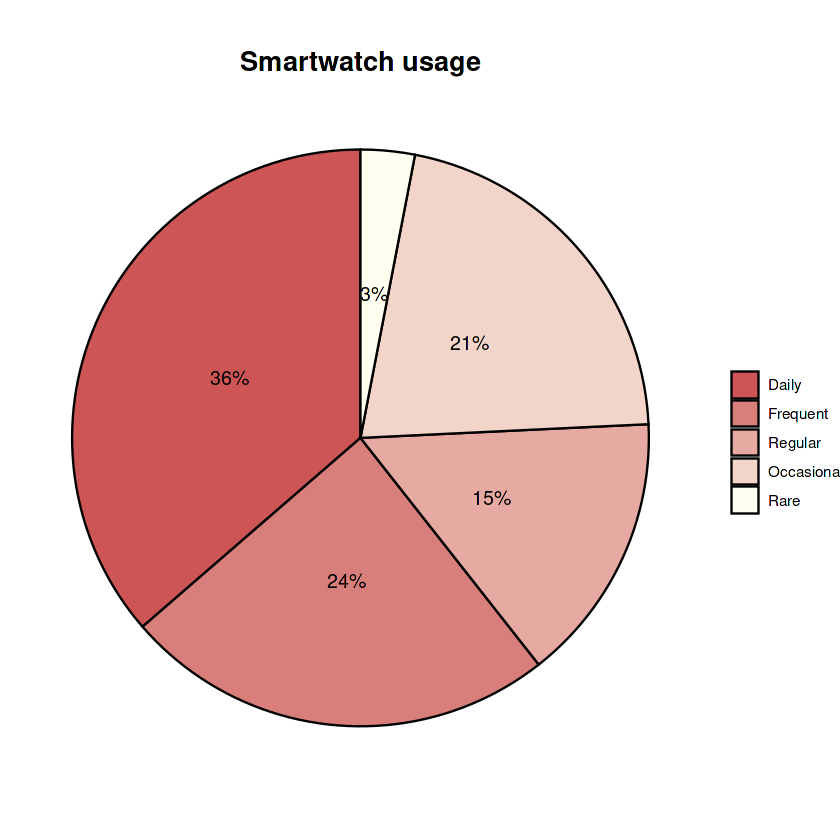

In [15]:
# Visualization
groupOrder <- c("Daily", "Frequent", "Regular", "Occasional", "Infrequent", "Rare")

groupCount <- count(wearDays, Group) %>%
    mutate(Percentage = round(n / sum(n) * 100)) %>%
    mutate(Group = factor(Group, levels = groupOrder)) %>%
    arrange(match(Group, groupOrder))

# View percentages
View(groupCount)

# Define the color range and group order
colorRange <- colorRampPalette(c("indianred3", "ivory1"))(length(unique(groupCount$Group)))

# Create the pie chart
ggplot(groupCount, aes(x = "", y = n, fill = Group)) +
    geom_bar(stat = "identity", width = 1, color = "black") +
    coord_polar("y", start = 0) +
    theme_void() +
    labs(title = "Smartwatch usage") +
    scale_fill_manual(values = colorRange) +
    geom_text(aes(label = paste0(round(Percentage), "%")), position = position_stack(vjust = 0.5), size = 4) +
    theme(plot.title = element_text(hjust = 0.5, size = 16, face = "bold"),
        legend.title = element_blank(),
        legend.position = "right"
    )

ggsave("1. Smartwatch usage.png", plot = last_plot())

### <span style="color: indianred"> 4.1.2 What days are our non daily wearers, not wearing their smartwatch? </span>

In [16]:
# First, determine timeframe of survey as reference
df <- dailyActivity

earliest <- min(df$ActivityDate)
latest <- max(df$ActivityDate)
num_days <- as.numeric(difftime(latest, earliest, units = "days")) +1

# Timeframe
Weekday <- c("Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday")
MaxCount <- c(4, 5, 5, 5, 4, 4, 4)
maxDayCount <- data.frame(Weekday, MaxCount)

View(maxDayCount)

Weekday,MaxCount
<chr>,<dbl>
Monday,4
Tuesday,5
Wednesday,5
Thursday,5
Friday,4
Saturday,4
Sunday,4


Saving 12.5 x 6.67 in image


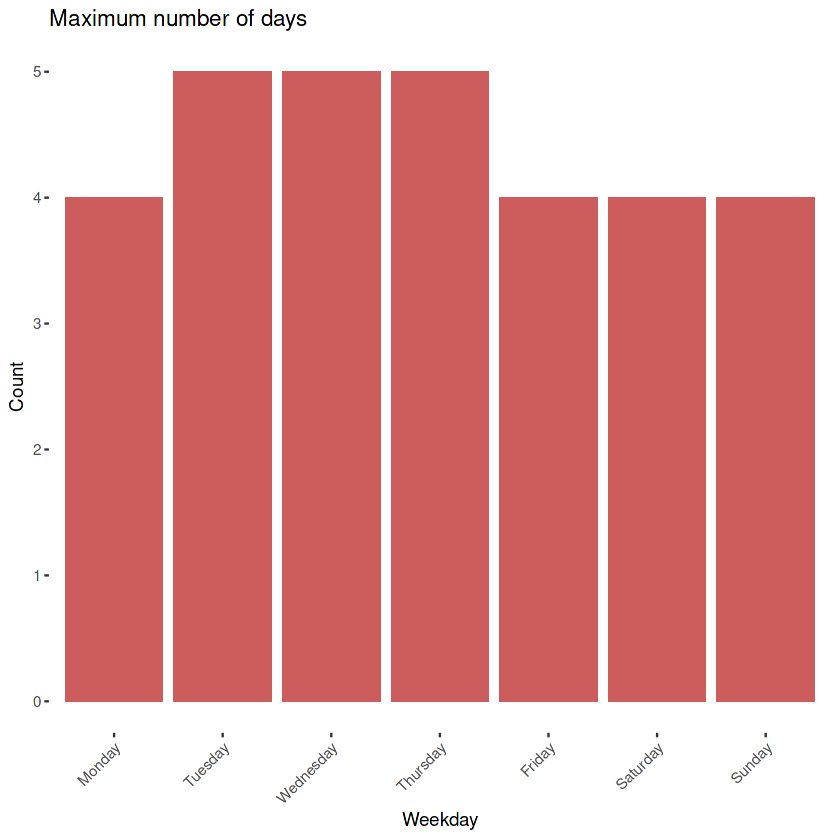

In [17]:
# Visualization
ggplot(maxDayCount, aes(x = factor(Weekday, levels = Weekday), y = MaxCount)) +
  geom_bar(stat = "identity", fill= "indianred") +
  labs(x = "Weekday", y = "Count", 
  title = "Maximum number of days")  +
  theme(panel.background = element_rect(fill = "white")) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

ggsave("2. Timeframe of data collection.png", plot= last_plot())

In [18]:
# Second, determine if there are certain days when the device is being used less

# Creating dataframe
DayOrder <- c("Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday")
df <- dailyActivity

# Count Weekdays for each Id
weekdayCount <- dailyActivity %>%
    group_by(Id, Weekday) %>%
    summarise(TotalDays = n()) %>%
    arrange(Id, match(Weekday, DayOrder))

# Average for each weekday
weekdayTotal <- weekdayCount %>%
    group_by(Weekday) %>%
    summarise(AverageCount = round(mean(TotalDays),2)) %>%
    merge(maxDayCount, by= "Weekday") %>%
    relocate(MaxCount, .after = "Weekday") %>%
    mutate(Difference = MaxCount - AverageCount) %>%
    arrange( match(Weekday, DayOrder))

View(weekdayTotal)

`summarise()` has grouped output by 'Id'. You can override using the `.groups`
argument.


Weekday,MaxCount,AverageCount,Difference
<chr>,<dbl>,<dbl>,<dbl>
Monday,4,3.41,0.59
Tuesday,5,4.09,0.91
Wednesday,5,4.18,0.82
Thursday,5,4.16,0.84
Friday,4,3.64,0.36
Saturday,4,3.50,0.50
Sunday,4,3.41,0.59


Saving 12.5 x 6.67 in image


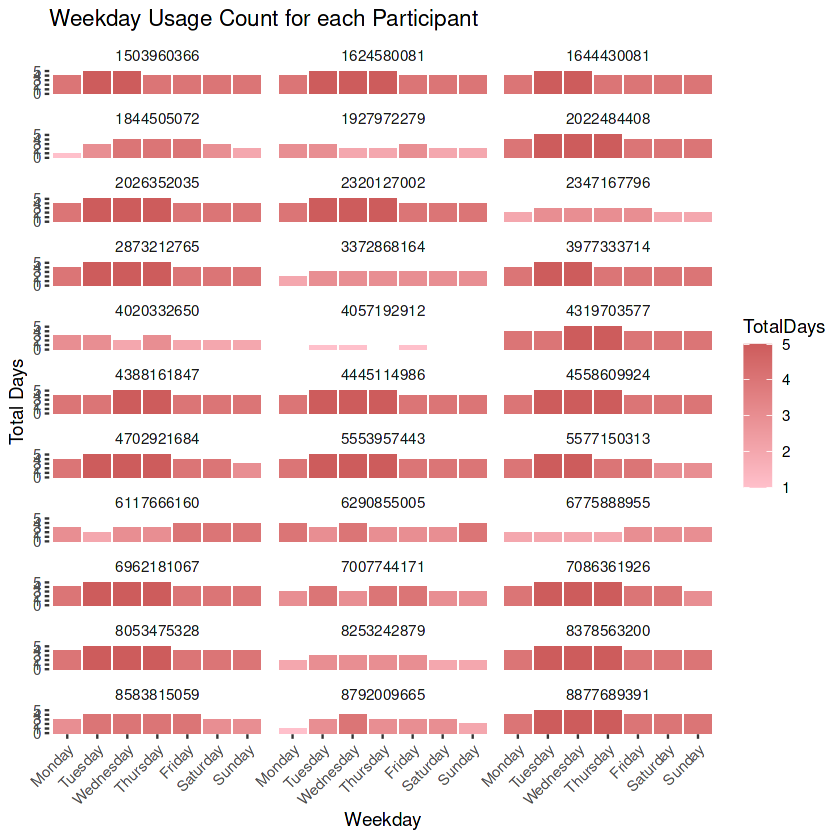

In [19]:
# Visualization
ggplot(weekdayCount, aes(x = factor(Weekday, levels = DayOrder), y = TotalDays, fill = TotalDays)) +
      scale_fill_gradient(low = "pink", high = "indianred") +
      geom_bar(stat = "identity") +
      facet_wrap(~ Id, nrow = 11) +
      labs(x = "Weekday", y = "Total Days", 
        title = "Weekday Usage Count for each Participant") +
      theme(panel.background = element_rect(fill = "white")) +
      theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
      theme(strip.background = element_blank())

ggsave("3. Weekday usage for each Id.png", plot= last_plot())

### <span style="color: indianred"> 4.1.3 Did non-wearers stopped wearing their smartwatch after a certain period? </span>

Saving 12.5 x 6.67 in image


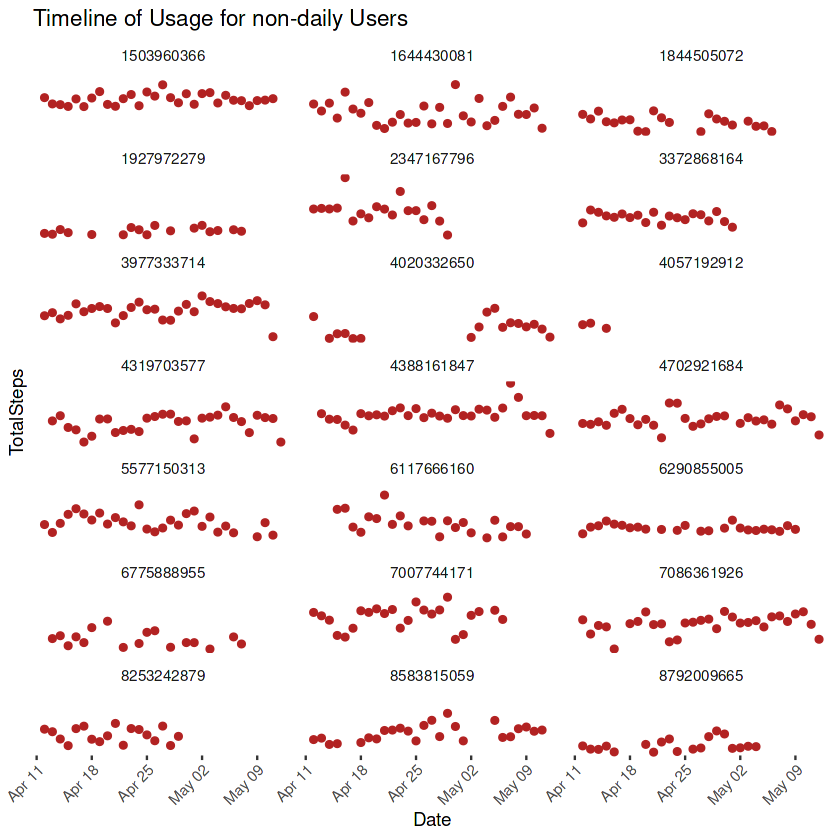

In [20]:
df <- dailyActivity %>%
  group_by(Id) %>%
  filter(n() < 31)

# Visualization
ggplot(df, aes(x = ActivityDate, y = TotalSteps)) +
  geom_point(color = "firebrick") +
  labs(x = "Date", y = "TotalSteps", title = "Timeline of Usage for non-daily Users") +
  scale_y_continuous(breaks = NULL) +
  facet_wrap(~ Id, ncol = 3) +
  theme(panel.background = element_rect(fill = "white"),
  axis.text.x = element_text(angle = 45, hjust = 1),
  strip.background = element_rect(fill = "white", color = "white"))

ggsave("4. Timeline of usage for non daily users.png", plot= last_plot())


<a id="4.2"></a>
## <span style="color: indianred"> 4.2 Step counting </span>
---
When the smartwatch was worn, the mean number of daily steps is 8329 and an average of 6,0km is being tracked.

---

There seem to be no clear day of preference for activities. <br>
The average number of steps is slightly higher at Monday, Tuesday and Saturday.<br>
The average number of steps is slightly lower at Friday and Sunday indicating people might be more sedentary.

---

There is a clear peak of steps around lunchtime (12pm), a dip at 3pm, and most steps are being registered after dinner (18-19pm).

---

### <span style="color: indianred"> 4.2.1 What is the average number of daily steps? </span>
*nb. when device is being worn*

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      4    4924    8054    8329   11100   36019 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   3.370   5.590   5.968   7.883  28.030 

Saving 12.5 x 6.67 in image


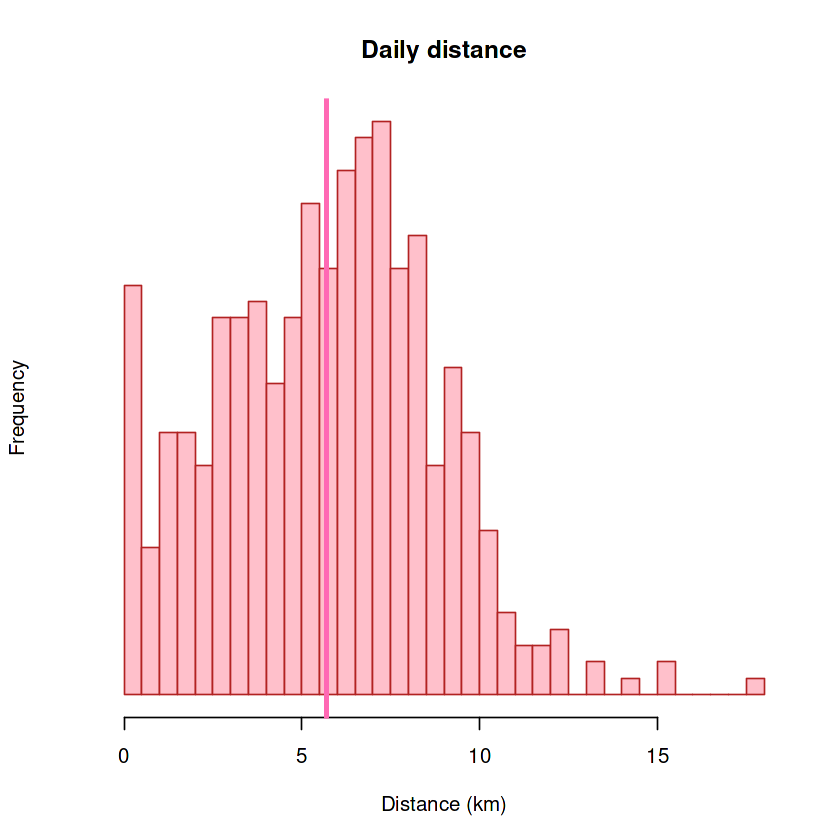

In [21]:
summary(dailyActivity$TotalSteps)
summary(dailyActivity$TrackerDistance)

# Visualization
hist(df$TrackerDistance,
    breaks= 30,
    col= "pink",
    border= "firebrick",
    main= "Daily distance",
    xlab= "Distance (km)",
    yaxt= "n",
    )

abline(v=mean(df$TrackerDistance),
    col="hotpink",
    lty=1,
    lwd=3,
    )

ggsave("5. Daily distance.png", plot= last_plot())

### <span style="color: indianred"> 4.2.2 At what day of the weeks are steps being recorded? <span>

Weekday,AverageTotalSteps
<chr>,<dbl>
Monday,8488.394
Tuesday,8926.748
Wednesday,8190.710
Thursday,8185.398
Friday,7820.642
Saturday,8979.018
Sunday,7668.927


Saving 12.5 x 6.67 in image


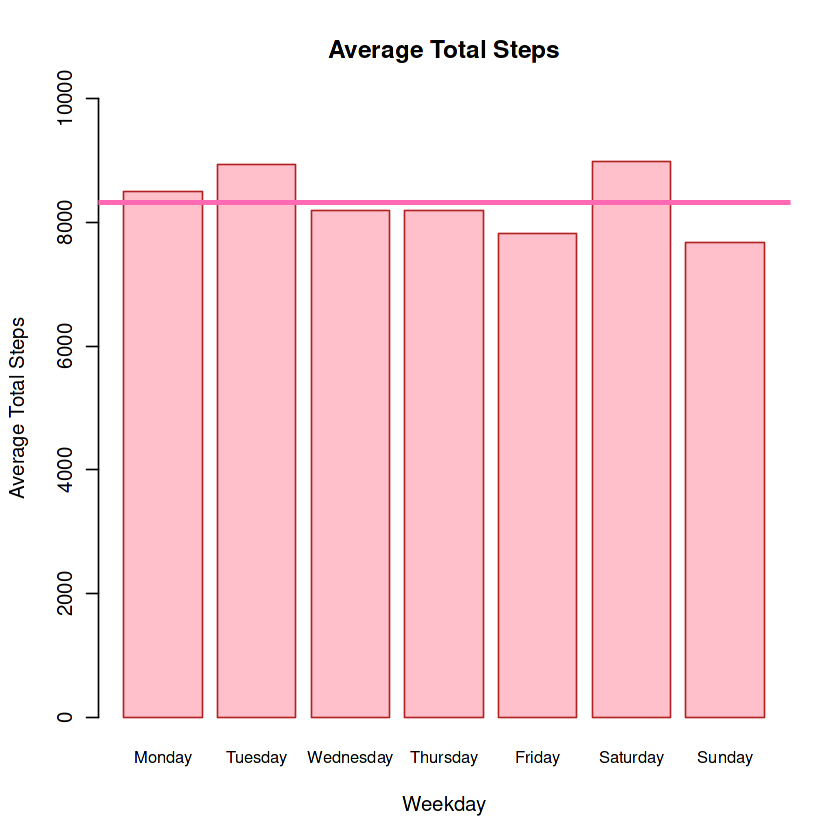

In [22]:
df <- dailyActivity
dayOrder <- c("Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday")

weekdayAverage <- df %>%
    group_by(Weekday) %>%
    summarise(AverageTotalSteps = mean(TotalSteps)) %>%
    arrange(match(Weekday, dayOrder))

View(weekdayAverage)

# Visualization
barplot(weekdayAverage$AverageTotalSteps, 
    names.arg= weekdayAverage$Weekday, 
    xlab= "Weekday",
    cex.names = 0.8,
    ylab= "Average Total Steps",
    ylim= c(0, 10000),
    main= "Average Total Steps", 
    col= "pink",
    border= "firebrick",
    )

abline(h=mean(weekdayAverage$AverageTotalSteps),
    col="hotpink",
    lty=1,
    lwd=3,
    )

ggsave("6. Average total steps for each weekday.png", plot= last_plot())

### <span style="color: indianred"> 4.2.3 At what time of the day steps are being recorded? </span>

Hour,AverageTotalSteps
<chr>,<dbl>
00,42.188437
01,23.102894
02,17.110397
03,6.426581
04,12.699571
05,43.869099


Saving 12.5 x 6.67 in image


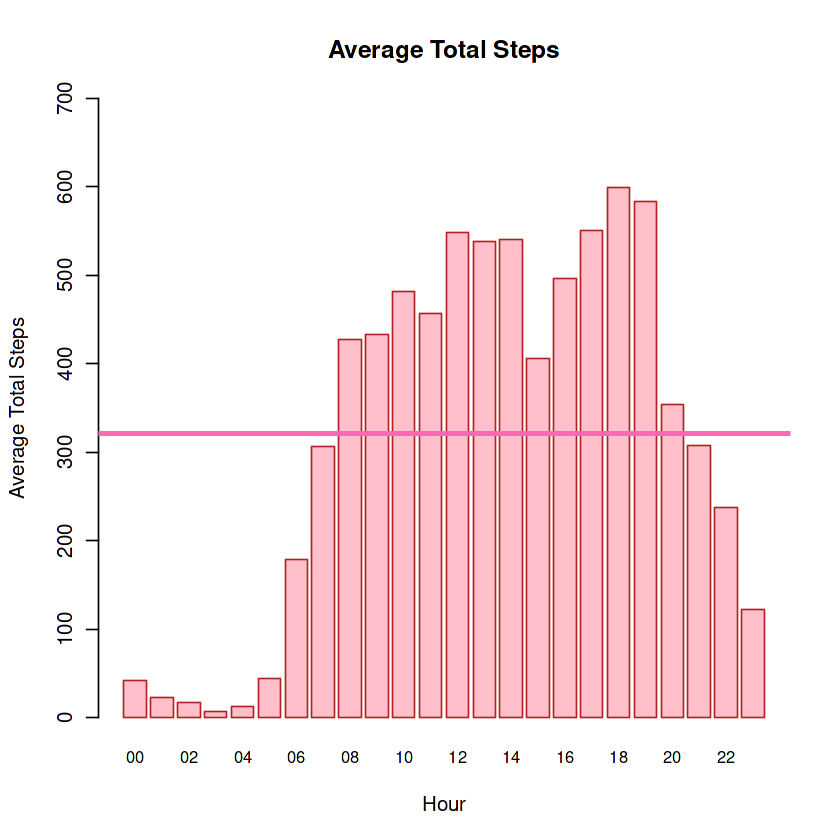

In [23]:
hourlyAverage <- hourlySteps %>%
    group_by(Hour) %>%
    summarise(AverageTotalSteps = mean(StepTotal))

head(hourlyAverage)

# Visualization
barplot(hourlyAverage$AverageTotalSteps, 
    names.arg = hourlyAverage$Hour, 
    xlab= "Hour",
    cex.names= 0.8,
    ylab= "Average Total Steps",
    ylim= c(0, 700),
    main= "Average Total Steps", 
    col= "pink",
    border= "firebrick"
    )

abline(h=mean(hourlyAverage$AverageTotalSteps),
    col="hotpink",
    lty=1,
    lwd=3,
    )

ggsave("7. Average total steps for each hour.png", plot= last_plot())

<a id="4.3"></a>
## <span style="color: indianred"> 4.3 Running </span>
---
The adoption and utilization of running activity tracking and logging is currently low. <br>
Roughly ~12% of users used the option to record a running workout with their smartwatch.

---

The median running distance is 2,3km and the maximum running distance recorded is 4,9km. <br>

---

There seem to be no clear day of preference for running. <br>
Wednesday showed a slighly above average workout distance. <br>
There was a complete absence of running activities during the weekend. <br>
This could indicate that smartwatch users tend to run on workdays only, but sample size is too low (n=4).

---

### <span style="color: indianred"> 4.3.1 How many people run? </span>

Saving 12.5 x 6.67 in image


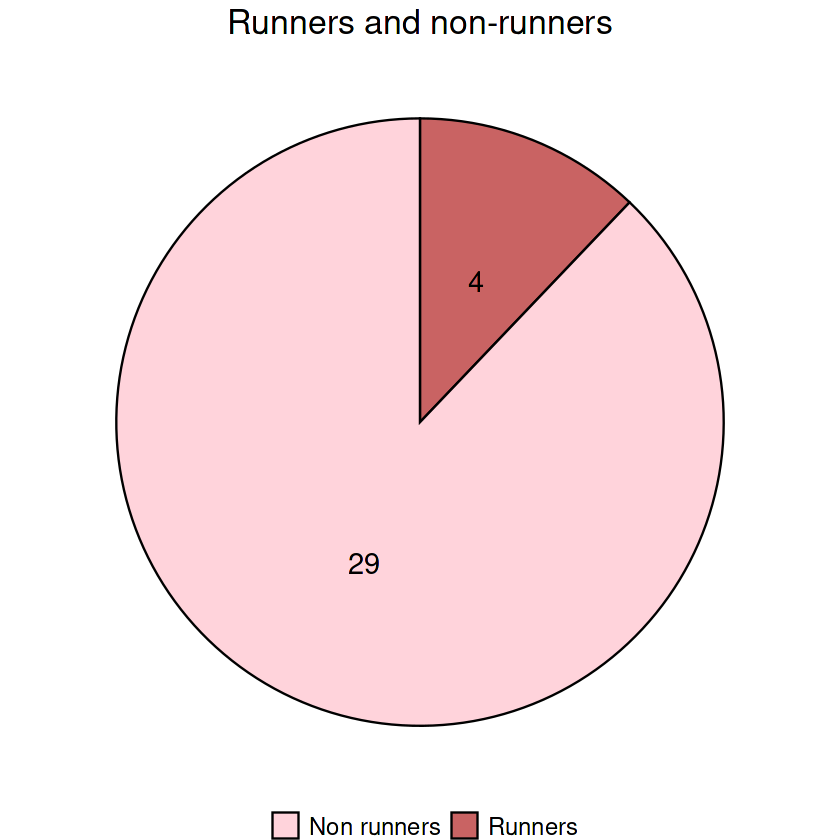

In [24]:
df <- dailyActivity
TotalUsers <- n_distinct(df$Id)

RunnerData <- filter(df, WorkoutDistance != 0)
Runners <- n_distinct(RunnerData$Id)
NoRunners <- TotalUsers-Runners

# Creating (temporary) dataframe for piechart and picking colors
df <- data.frame(value = c(Runners, NoRunners), group = c("Runners", "Non runners"))
colors <- c("pink", "firebrick")
colors <- adjustcolor(colors, alpha.f = 0.7)

# Creating piechart
ggplot(df, aes(x = "", y = value, fill = group)) +
    geom_col(color = "black") +
    scale_fill_manual(values = colors) +
    coord_polar(theta = "y", start=0) +
    geom_text(aes(label= value),
            position = position_stack(vjust = 0.5),
            color = "black",
            size = 6) +
    labs(title= "Runners and non-runners") +
    theme_void() +
    theme(
        plot.title = element_text(size = 20, hjust = 0.5),
        legend.position = "bottom",
        legend.title = element_blank(),
        legend.text = element_text(size = 14))

ggsave("8. Runners and non-runners.png", plot= last_plot())

### <span style="color: indianred"> 4.3.2 What kind of distance do runners cover? </span>

[1] 2.3

[1] 4.9

Saving 12.5 x 6.67 in image


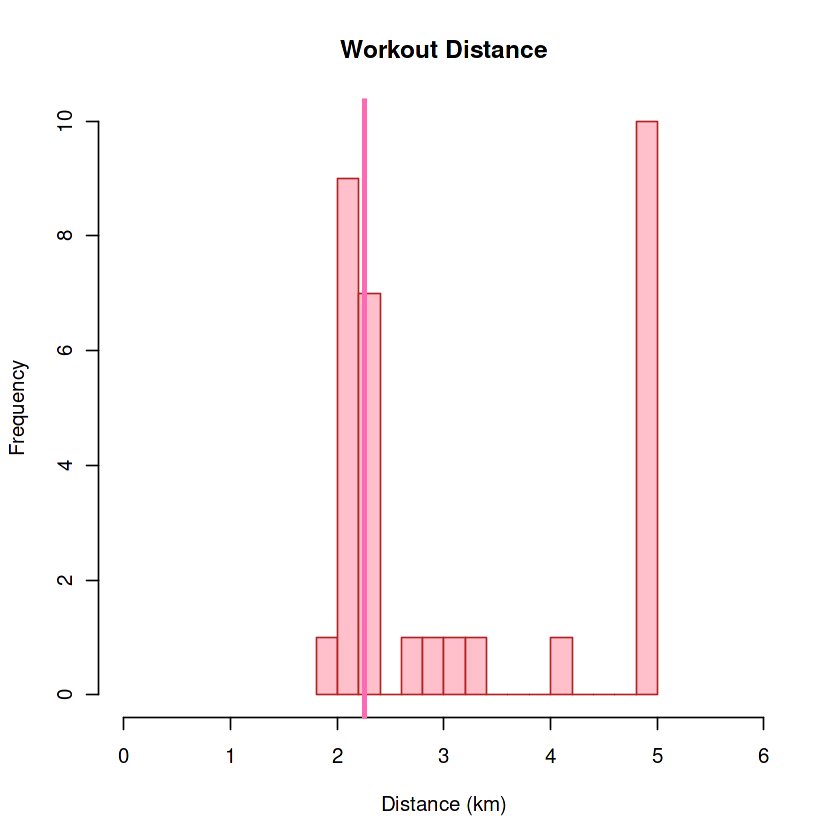

In [25]:
round(median(RunnerData$WorkoutDistance),1)
round(max(RunnerData$WorkoutDistance),1)

hist(RunnerData$WorkoutDistance,
    breaks= 15,
    col= "pink",
    border= "firebrick",
    main= "Workout Distance",
    xlab= "Distance (km)",
    xlim= c(0,6)
    )

abline(v=median(RunnerData$WorkoutDistance),
    col="hotpink",
    lty=1,
    lwd=3,
    )

ggsave("9. Workout distance.png", plot= last_plot())

### <span style="color: indianred"> 4.3.3 At which days do runners run? </span>

Saving 12.5 x 6.67 in image


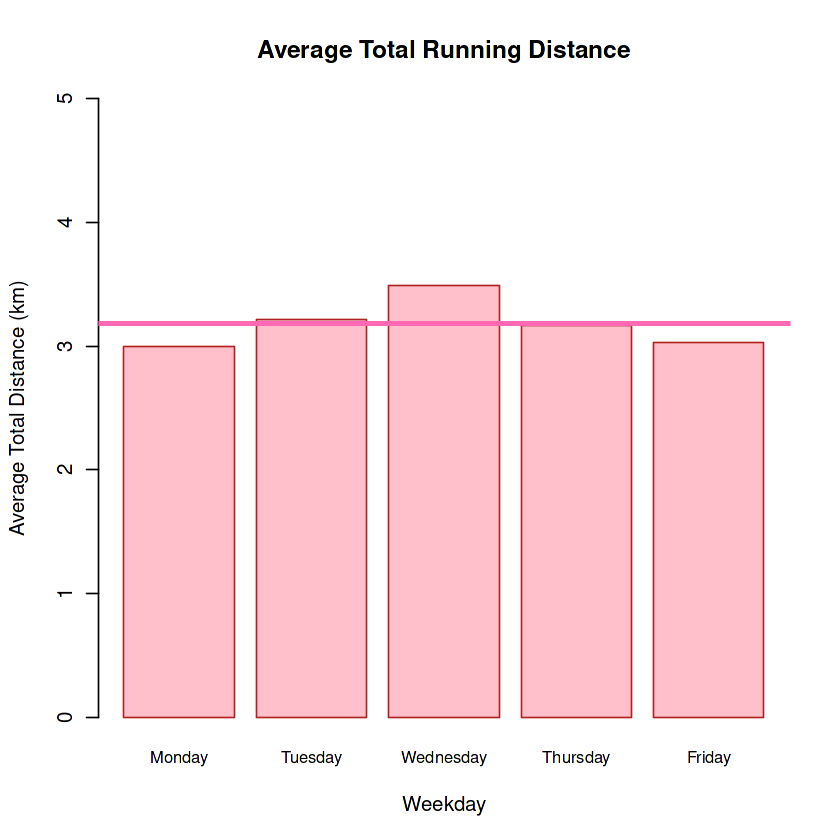

In [26]:
df <- RunnerData
weekdayOrder <- c("Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday")

WeekdayAverage <- df %>%
  group_by(Weekday) %>%
  summarise(AverageWorkoutDistance =  mean(WorkoutDistance)) %>%
  arrange(match(Weekday, weekdayOrder))

# Visualization
barplot(WeekdayAverage$AverageWorkoutDistance, 
        names.arg = WeekdayAverage$Weekday, 
        xlab = "Weekday",
        cex.names = 0.8,
        width= 30,
        ylab = "Average Total Distance (km)",
        ylim = c(0, 5),
        main = "Average Total Running Distance", 
        col  = "pink",
        border= "firebrick"
        )

abline(h=mean(WeekdayAverage$AverageWorkoutDistance),
       col="hotpink",
       lty=1,
       lwd=3,
       )

ggsave("10. Average running distance for each weekday.png", plot= last_plot())

<a id="4.4"></a>
## <span style="color: indianred"> 4.4 Intensities and Sleep </span>
---
The amount of sedentary minutes** recorded is high. <br>
On average, people are only active ~4 hours a day. <br>
This is in accordance with the data on heartrate (n=14), which shows a median heart rate of 73bpm.

---
People do not achieve the recommended duration of 8 hours of sleep. <br>
Even on Sunday, with a max. avg. hours of ~7.5 hours, the recommendation is not met.

---
A linear regression analysis suggests that daily active minutes can only explain ~3.4% of the variability in sleep duration. <br>
The relationship between the two variables is not statistically significant (p= 0.39).

There is a strong correlation between time in bed and time asleep. <br>
A number of participants were found to have higher sleep latency (i.e. relatively long bed time in comparison to sleep time). <br>
We found no indication that the level of activity improves a person's sleep latency (R-squared=0.025, p=0.45). <br>

---

### <span style="color: indianred"> 4.4.1 What intensities are being recorded? </span>

In [27]:
# Creating the dataframe
df <- dailyActivity

dfInt <- df %>%
    select(VeryActiveMinutes, FairlyActiveMinutes, LightlyActiveMinutes, SedentaryMinutes)

summary(dfInt)

# Pivotting to right dataframe for visualization
dfInt <- dfInt %>%
  pivot_longer(
    cols = ends_with("Minutes"),  
    names_to = "Type",  
    values_to = "Time"
    )

 VeryActiveMinutes FairlyActiveMinutes LightlyActiveMinutes SedentaryMinutes
 Min.   :  0.0     Min.   :  0.0       Min.   :  1.0        Min.   :   0.0  
 1st Qu.:  0.0     1st Qu.:  0.0       1st Qu.:148.0        1st Qu.: 720.8  
 Median :  7.0     Median :  8.0       Median :209.5        Median :1019.5  
 Mean   : 23.2     Mean   : 14.9       Mean   :211.7        Mean   : 951.8  
 3rd Qu.: 36.0     3rd Qu.: 21.0       3rd Qu.:272.0        3rd Qu.:1187.2  
 Max.   :210.0     Max.   :143.0       Max.   :518.0        Max.   :1439.0  

Picking joint bandwidth of 24.1

Saving 12.5 x 6.67 in image
Picking joint bandwidth of 24.1



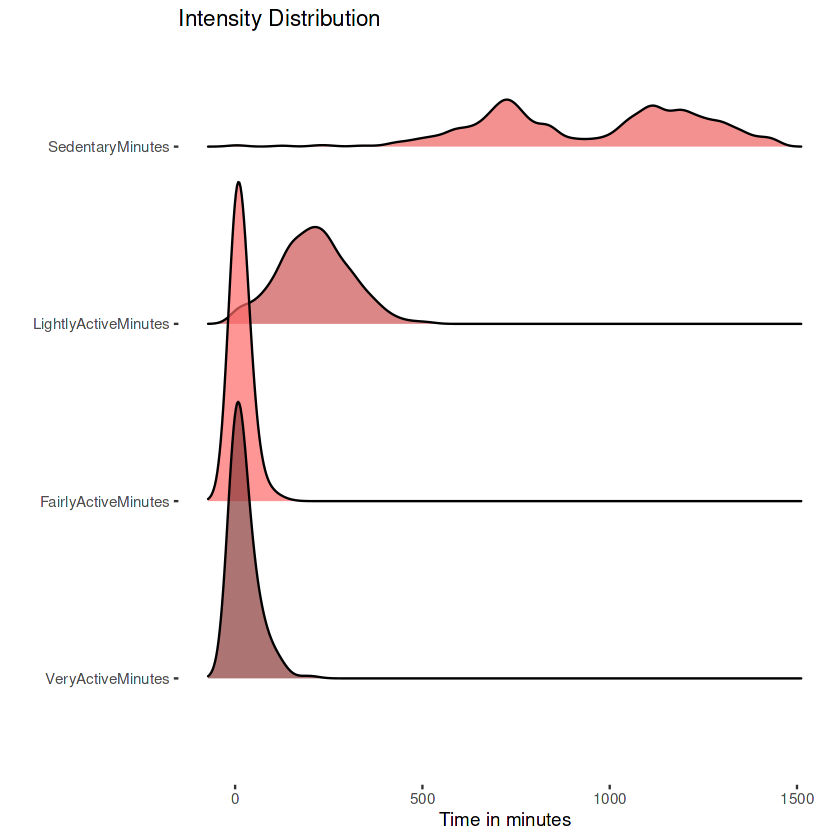

In [28]:
# Visualization
colors <- c("indianred1", "indianred3", "indianred2", "indianred4")
colors <- adjustcolor(colors, alpha.f = 0.7)

ggplot(data = dfInt, aes(x = Time, y = reorder(Type, Time, FUN = median))) +
    geom_density_ridges(aes(fill = Type)) +
    scale_fill_manual(values = colors) +
    labs(title = "Intensity Distribution") +
    xlab("Time in minutes") +
    ylab("") +
    theme(legend.position = "none",
    panel.background = element_rect(fill = "white"))

ggsave("11. Intensity distribution.png", plot= last_plot())

[1] 73

Saving 12.5 x 6.67 in image
Picking joint bandwidth of 24.1



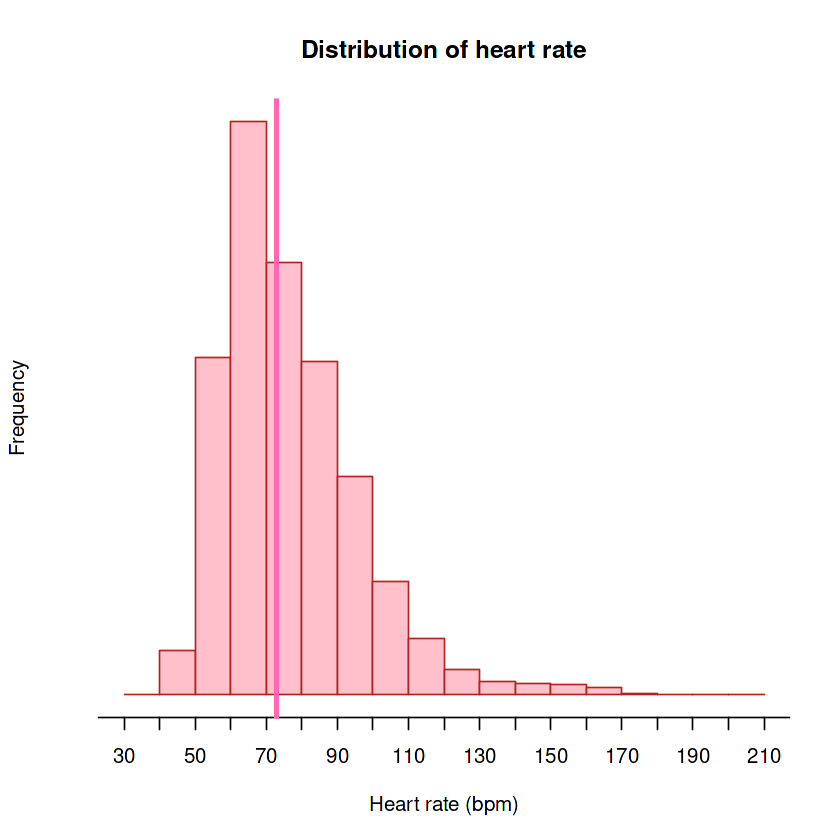

In [29]:
# Determine HR distribution
df <- heartrate

hist(df$Value,
    breaks= 15,
    col= "pink",
    border= "firebrick",
    main= "Distribution of heart rate",
    xlab= "Heart rate (bpm)",
    yaxt= "n",
    xaxt= "n")

axis(side=1, at=seq(0,250, 10))

abline(v=median(df$Value),
    col="hotpink",
    lty=1,
    lwd=3,
    )

median(df$Value)

ggsave("12. Distribution of heart rate.png", plot= last_plot())

### <span style="color: indianred"> 4.4.2 Do people sleep enough? </span>

Weekday,meanSleep
<chr>,<dbl>
Monday,419.5000
Tuesday,404.5385
Wednesday,434.6818
Thursday,401.2969
Friday,405.4211
Saturday,419.0702
Sunday,452.7455


Saving 12.5 x 6.67 in image
Picking joint bandwidth of 24.1



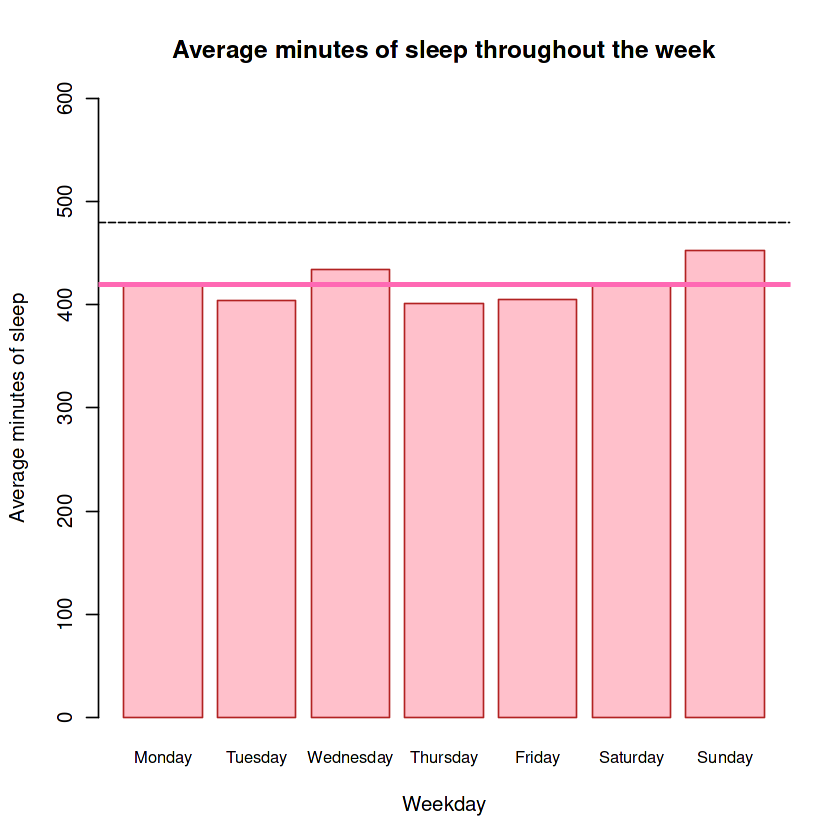

In [30]:
# Visualization
df <- sleep
dayOrder <- c("Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday")

sleepDays <- df %>%
    group_by(Weekday) %>%
    summarise(meanSleep = mean(TotalMinutesAsleep)) %>%
    arrange(match(Weekday, dayOrder))

View(sleepDays)

# Visualization
barplot(sleepDays$meanSleep, 
    names.arg= sleepDays$Weekday, 
    xlab= "Weekday",
    cex.names = 0.8,
    ylab= "Average minutes of sleep",
    ylim= c(0, 600),
    main= "Average minutes of sleep throughout the week", 
    col= "pink",
    border= "firebrick",
    )

# Adding 8 hour (dotted) and average sleep line (pink)
abline(h = 480, col = "black", lty = 5, lwd = 1)
abline(h=mean(sleepDays$meanSleep),col="hotpink",lty=1,lwd=3)

ggsave("13. Average minutes of sleep throughout the week.png", plot= last_plot())

### <span style="color: indianred"> 4.4.3 Does being active improve sleep latency? </span>

In [31]:
# Preparing dataframe for analysis
dfInt <- dailyActivity %>%
    group_by(Id) %>%
    summarise(meanVAM = mean(VeryActiveMinutes),
              meanFAM = mean(FairlyActiveMinutes),
              meanLAM = mean(LightlyActiveMinutes),
              meanSM = mean(SedentaryMinutes),
              meanSteps = mean(TotalSteps)) %>%
    mutate(meanActiveMin = meanVAM + meanFAM + meanLAM) %>%
    relocate(meanSteps, .after= "Id")

# Classify based on quartiles of daily mean active minutes
summary(dfInt$meanActiveMin)
summary(dfInt$meanSteps)

dfInt <- dfInt %>%
  mutate(ActivityGroup = case_when(
   meanActiveMin >= 287.07 ~ "Very Active",
   meanActiveMin >= 241.18 ~ "Active", 
   meanActiveMin >= 202.13 ~ "Low Active",
   meanActiveMin >= 0  ~ "Inactive" 
  ))

#View(dfInt)

# Merge with sleep data for later analysis
df <- sleep %>%
    group_by(Id) %>%
    summarise(meanSleep = mean(TotalMinutesAsleep),
              meanBed = mean(TotalTimeInBed)) %>%
    merge(dfInt, by= "Id")

head(df)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  74.18  202.13  252.83  241.18  287.07  355.43 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1671    5567    7630    7928    9684   16040 

,Id,meanSleep,meanBed,meanSteps,meanVAM,meanFAM,meanLAM,meanSM,meanActiveMin,ActivityGroup
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,1503960366,360.2800,383.2000,12520.633,40.00000000,19.8000000,227.26667,828.4333,287.06667,Active
2,1644430081,294.0000,346.0000,7282.967,9.56666667,21.3666667,178.46667,1161.8667,209.40000,Low Active
3,1844505072,652.0000,961.0000,3808.667,0.19047619,1.9047619,170.42857,1130.1905,172.52381,Inactive
4,1927972279,417.0000,437.8000,1670.588,2.41176471,1.4117647,70.35294,1244.3529,74.17647,Inactive
5,2026352035,506.1786,537.6429,5566.871,0.09677419,0.2580645,256.64516,689.4194,257.00000,Active
6,2320127002,61.0000,69.0000,4716.871,1.35483871,2.5806452,198.19355,1220.0968,202.12903,Inactive


`geom_smooth()` using formula = 'y ~ x'


[1] 0.02597501

(Intercept) meanActiveMin 
    0.1198524     0.4518426

Saving 12.5 x 6.67 in image
`geom_smooth()` using formula = 'y ~ x'


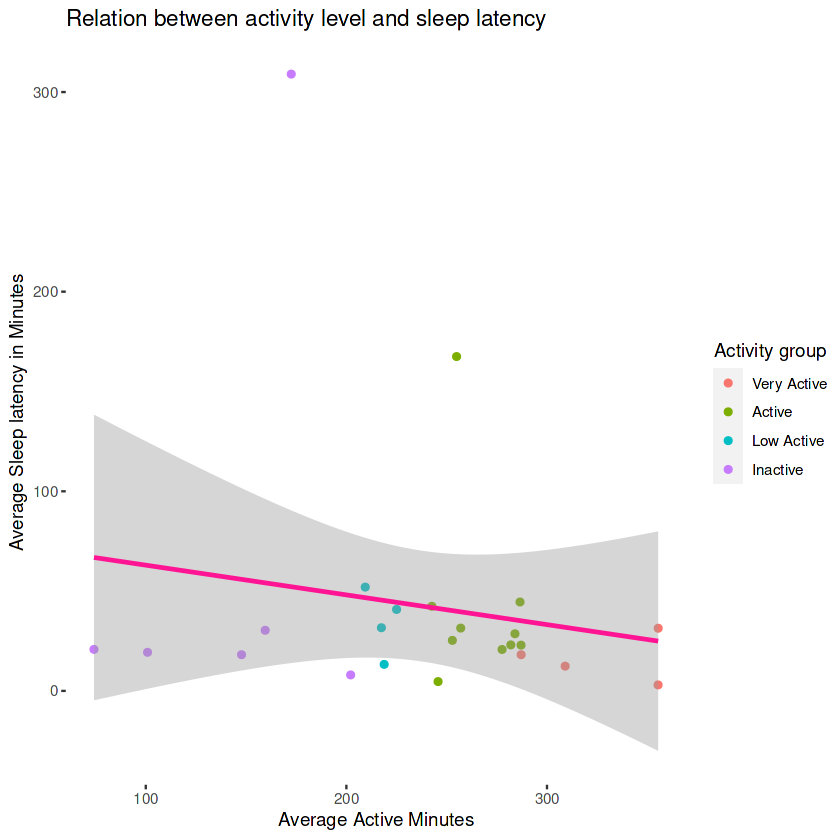

In [32]:
# Adding sleep latency to our dataframe
df <- df %>%
    mutate(SleepLatency = meanBed - meanSleep)

# Visualization
df$ActivityGroup <- factor(df$ActivityGroup, levels = c("Very Active", "Active", "Low Active", "Inactive"))

ggplot(df, aes(x = meanActiveMin, y = SleepLatency)) +
    geom_point(aes(color= ActivityGroup)) +
    geom_smooth(method = "lm", color = "deeppink") +
    labs(title = "Relation between activity level and sleep latency",
         x = "Average Active Minutes",
         y = "Average Sleep latency in Minutes",
         color = "Activity group") +
    theme(legend.position = "right",
    panel.background = element_rect(fill = "white"))

# Statistics
model <- lm(SleepLatency ~ meanActiveMin, data = df)
r_squared <- summary(model)$r.squared
p_value <- summary(model)$coefficients[,4]

r_squared
p_value

ggsave("14. Relation between activity level and sleep latency.png", plot= last_plot())

<a id="4.5"></a>
## <span style="color: indianred"> 4.5 Weight </span>
Only 24% of participants register their weight, most did so only once or twice. 

---
Some participants logged their weight with a smart weightscale. However, the registration rate did not improve for smart weightscale users.

---
The median weight is 62,5kg and the BMI is 24,4, a relatively large group of people is slightly overweight (3rd Q > BMI 25). <br> 

---



### <span style="color: indianred"> 4.5.1 Participation and general characteristics </span>

In [33]:
df <- weightLog

# Participation (%)
round(n_distinct(weightLog$Id)/n_distinct(dailyActivity$Id)*100)

summary(df)

[1] 24

       Id                 Date                        WeightKg     
 Min.   :1.504e+09   Min.   :2016-04-12 06:47:11   Min.   : 52.60  
 1st Qu.:6.962e+09   1st Qu.:2016-04-19 15:19:45   1st Qu.: 61.40  
 Median :6.962e+09   Median :2016-04-27 23:59:59   Median : 62.50  
 Mean   :7.009e+09   Mean   :2016-04-27 15:39:54   Mean   : 72.04  
 3rd Qu.:8.878e+09   3rd Qu.:2016-05-04 15:24:10   3rd Qu.: 85.05  
 Max.   :8.878e+09   Max.   :2016-05-12 23:59:59   Max.   :133.50  
                                                                   
  WeightPounds        Fat             BMI        IsManualReport    
 Min.   :116.0   Min.   :22.00   Min.   :21.45   Length:67         
 1st Qu.:135.4   1st Qu.:22.75   1st Qu.:23.96   Class :character  
 Median :137.8   Median :23.50   Median :24.39   Mode  :character  
 Mean   :158.8   Mean   :23.50   Mean   :25.19                     
 3rd Qu.:187.5   3rd Qu.:24.25   3rd Qu.:25.56                     
 Max.   :294.3   Max.   :25.00   Max.   :47.54  

### <span style="color: indianred"> 4.5.2 Weighing frequency </span> 

[1] 31

Id,UniqueDates,WeighingRate
<dbl>,<int>,<int>
1503960366,2,6
1927972279,1,3
2873212765,2,6
4319703577,2,6
4558609924,5,16
5577150313,1,3
6962181067,30,96
8877689391,24,77


Saving 12.5 x 6.67 in image
`geom_smooth()` using formula = 'y ~ x'


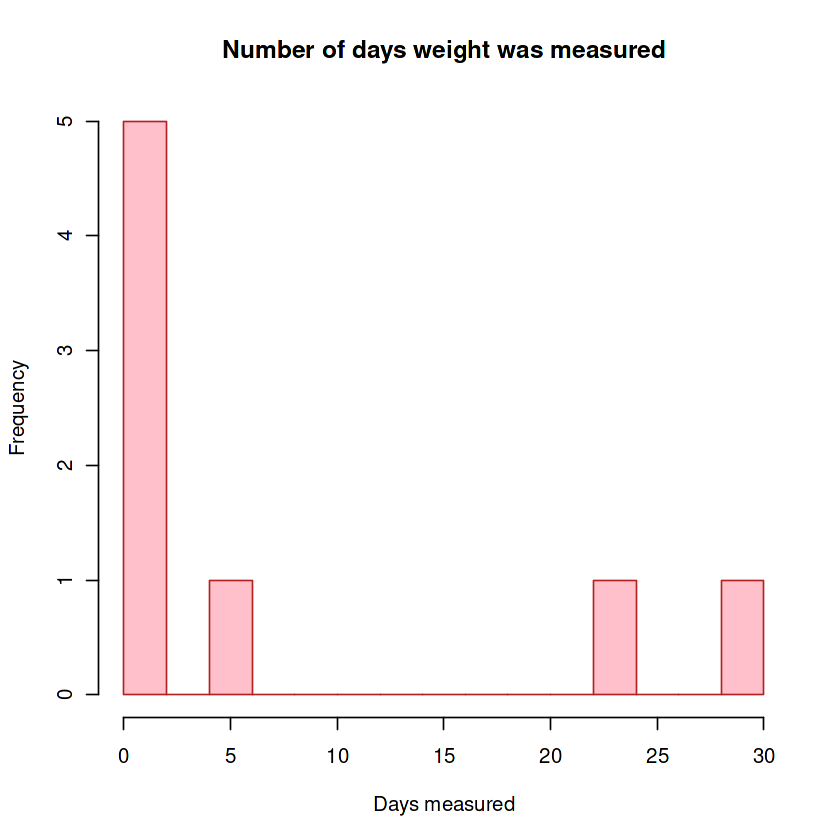

In [34]:
df <- weightLog

# Total days
earliest <- min(df$Date)
latest <- max(df$Date)
Total <- as.integer(difftime(latest, earliest, units = "days")) +1
Total

# Recording rate
numDay <- df %>%
  group_by(Id) %>%
  summarise(UniqueDates = n_distinct(Date)) %>%
  mutate(WeighingRate = as.integer((UniqueDates / Total) * 100))

View(numDay)
hist(numDay$UniqueDates,
    breaks= 15,
    col= "pink",
    border= "firebrick",
    main= "Number of days weight was measured",
    xlab= "Days measured",
    )

ggsave("15. Number of days weight was measured.png", plot= last_plot())

### <span style="color: indianred"> 4.5.3 Smartweight scales </span> 

In [35]:
df <- weightLog

# Distinguish two groups - those having a smart weightscale (Smart) and a regular weightscale (NoSmart) for easier access
filterSmart <- filter(df, IsManualReport == "False")
numDaySmart <- filterSmart %>%
  group_by(Id) %>%
  summarise(UniqueDates = n_distinct(Date)) %>%
  mutate(WeighingRate = as.integer((UniqueDates / Total) * 100))

filterNoSmart <- filter(df, IsManualReport == "True")
numDayNoSmart <- filterNoSmart %>%
  group_by(Id) %>%
  summarise(UniqueDates = n_distinct(Date)) %>%
  mutate(WeighingFreq = as.integer((UniqueDates / Total) * 100))

# Combine the data into a single data frame, with source
combined_df <- rbind(data.frame(UniqueDates = numDaySmart, Source = "numDaySmart"),
                     data.frame(UniqueDates = numDayNoSmart, Source = "numDayNoSmart"))

combined_df <- combined_df %>%
  rename_with(~"UniqueDates", UniqueDates.UniqueDates) %>%
  rename_with(~"Id", UniqueDates.Id) %>%
  rename_with(~"WeighingFreq", UniqueDates.WeighingFreq)
View(combined_df)

ERROR: Error in match.names(clabs, names(xi)): names do not match previous names


In [ ]:
# Creating visualization
hist(combined_df$UniqueDates[combined_df$Source == "numDayNoSmart"],
     breaks = 15,
     col = "pink",
     border = "white",
     main = "Number of days weight was measured",
     xlab = "Days measured",
     xlim = c(0, 31),
)

hist(combined_df$UniqueDates[combined_df$Source == "numDaySmart"],
     breaks = 15,
     col = "firebrick",
     border = "white",
     add = TRUE
)

legend("topright", 
       legend = c("Regular weightscale", "Smart weightscale"),
       fill = c("pink", "firebrick"), 
       title = "",
       bty = "n",
       x = 20, y = 3
)

ggsave("16. Regular vs Smart weightscale.png", plot= last_plot())


<a id="key"></a>
# <span style="color: firebrick"> 5. Key insights  </span>
---
After analyzing the data we could summarize our main findings as follows:

**4.1 Participation and smartwatch usage**
- About ~36% of people have consistently worn their smartwatch on a daily basis. 
- A rather large group, ~24% of people, have only worn their smartwatch less than half of the days.
- After skipping a day of usage, about half of individuals resumed wearing it. The other half distinctly ceased wearing the smartwatch at a particular point in time and did not resume using it thereafter.

**4.2 Steps**
- When the smartwatch was worn, the mean number of daily steps is 8329 and an average of 6,0km is being tracked.
- There seem to be no clear day of preference for activities. The average number of steps is slightly higher at Monday, Tuesday and Saturday.The average number of steps is slightly lower at Friday and Sunday indicating people might be more sedentary.
- There is a clear peak of steps around lunchtime (12pm), a dip at 3pm, and most steps are being registered after dinner (18-19pm).

**4.3 Running**
- Roughly ~12% of users used the option to record a running workout with their smartwatch.
- The device is not used for long distance running, the median running distance is 2,3km and the maximum running distance recorded is 4,9km.
- We found indications that users prefer to run on workdays.

**4.4 Intensities and sleep**
- The amount of sedentary minutes recorded is high. On average, people are only active ~4 hours a day. - People do not achieve the recommended duration of 8 hours of sleep.
- Active minutes and sleep duration are not related.
- Activity does not improve sleep latency.

**4.5 Weight**
- Only 24% of participants register their weight, most did so only once or twice a month.
- The registration rate did not improve for smart weightscale users.
- The median weight is 62,5kg and the BMI is 24,4, a relatively large group of people is slightly overweight (3rd Q > BMI 25).

---

<a id="recom"></a>
# <span style="color: firebrick"> 6. Recommendations  </span>
---
After analyzing the data we would like to share the following recommendations with our stakeholders:

## <span style="color: indianred"> 6.1 Marketing </span>
---

**Target audience** <br>
Bellabeat's target audience are moderately active women, who - based on the amount of sedentary time - could have (full-time) officejobs. More detailed data about their daily routines and demographics could help determine Bellabeat's niche. <br>
Bellabeat's target audience is susceptible to overweight, but willing to pursue a healthy and active lifestyle. 

We can conclude that the device is not being used by dedicated runners, and certainly not by long-distance runners. <br>
It would be interesting to further investigate why smartwatch wearers are reluctant to run. <br>

**Commercials** <br>
Bellabeat could optimize the timing of their commercials by showing adds prior to the observed activity peaks at noon and after dinner. 

**Business development** <br>
Bellabeat could either further invest in the niche of active non-running women, or try to motivate women to run and strive to increase their marketshare by competing with manufacturers with products dedicated to running (such as Polar, Garmin etc.) <br>
We highly discourage launching a smart weightscale. Smart weightscales are expensive and our analysis has shown that it is unlikely to improve weight awareness.

## <span style="color: indianred"> 6.2 Increase device engagement </span>
---

To increase user engagement, implementation of personalized notifications or gamification elements to encourage people to wear the watch should be considered. 

Most definetly people should be reminded (via the App) to resume wearing the watch, in particular after a period of not wearing the watch - since we know there is a high chance they will otheriwse not wear the watch for a longer period of time.

Gamification could engage people and increase the number of steps. Introducing a challenge each Sunday could increase user engagement and improve activity for this particular day. Notifications should only be used to "warn" people. We found people are unable to stay active around 15:00-16:00pm. We highly recommend by reminding them of inactivity and above all - seize this oppertunity by suggesting a certain (after dinner) walk or workout - since this timeframe often allows people to become active.

Although a limited group of people used the workoutfunction, we suggest introducing a 5 kilometer workout programme and the ability to track personal records. It could improve the distance covered by (aspiring) runners and could perhaps convince non-runners to become more active. Aiming for workouts on Wednesdays and Sundays (to improve activity) is advised. 